# 1) Data Import and Important libraries

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Getting the data from google drive
!gdown --id '1ZLsD1w5YXX0QgfupwC0gYTOGASa-nbkR'

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZLsD1w5YXX0QgfupwC0gYTOGASa-nbkR
To: /content/zameen-updated.csv
100% 49.5M/49.5M [00:00<00:00, 169MB/s]


In [7]:
data=pd.read_csv('/content/zameen-updated.csv')
data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


# 2) Statical Analysis

In [8]:
data.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


# 2.1 Insites
This data tell us that in some there are some outliers are there.
#### Like
The price parameter has mean of 1.776576e+07 but the max value is 2.000000e+09 and 75% values are 1.950000e+07. That's means it has outliers that are making this field unstructured.


# 3) Data Cleaning

In [9]:
data.head(2)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla


### 3.1 First let's understand the dataset
We don't need 

1. proporty_id
2. location_id
3. page_url
4. area
5. area Category 

because these all have nothing to do with our model. That is why drop these parameters.

In [10]:
#columns drop
data=data.drop(['property_id','location_id','page_url','area','Area Category'],axis=1)
data.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0


### 3.2 Null values

In [12]:
data.isnull().sum()

property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
dtype: int64

Here we have 44071 null values from agency and agent only. That is the 26 percentage of total dataset.

In [26]:
total_values=data.index.stop
null_values=data['agency'].isnull().sum()

percentage=null_values/total_values
percentage

0.2616328081402942

In [34]:
#Unique values of agency and agent
agency_uniques=data['agency'].unique()[0:-1]
list(agency_uniques)

[nan,
 'Easy Property',
 'Ettemad Enterprises',
 'Crown Associate',
 'Al Sahar Estate',
 'Infinity Properties',
 'Paris Real Estate & Builders',
 'Property Syendicate',
 'Zorje Pvt Ltd',
 'Nexus Estate Services',
 'Real Biz International',
 'Khan Estate',
 'Shahum Estate 2',
 'MATZ Services',
 'Sukhera Estate & Builders',
 'Hamza Real Estate',
 'Rana Estate',
 'Punjab Associates',
 'Forces Properties',
 'Punjaab Estates',
 'Valo Marketing',
 'Ibraheem Associates',
 'Al-Ghous Real Estate Management & Construction',
 'Mughal Estate & Builders',
 'Musa Enterprises',
 'Premier Properties',
 'Well Known Properties',
 'Karachi Real Estate Investment Trust',
 'Universal Estate & Builders',
 'Property Master',
 'United Real Estate',
 'Memon Real Estate',
 'Vigilant Property Solutions',
 'Patel Builders',
 'Estate 1. com',
 'Guide Line Real Estate',
 'Khatwani Estate',
 'Entrepreneur Real Estate',
 'Shah Zain Associates',
 'Property Panel',
 'Al Karam Property',
 'National Property Advisor',
 '

In [36]:
#For agent
list(data['agent'].unique())

[nan,
 'Muhammad Junaid Ceo Muhammad Shahid Director',
 'Balqiaz Marwat',
 'Abrar Ahmed',
 'Zahid H. Usmani',
 'Ettemad',
 'Ali',
 'Chaudhary Naveed',
 'Rizwan Shafqat',
 'Obaid Abbasi',
 'Ch Afzal/ Ch Faisal/ Ch Adeel',
 'Usama Khan',
 'mohsinkhan and B',
 'Babar Hameed, Raja Omar',
 'Group Captain (R) Tajammul Baig',
 'Ahmed Sheraz Sukhera',
 'Imran Shahad',
 'Rana Shahzad',
 'Ch. Tariq Ali Ranjha',
 'Khalid Saeed Khan',
 'Irfan Rehman Khan',
 'Nabeel Khalid Ch M Naveed Muhammad Bin Shahid',
 'Miss Noor ul Huda',
 'Muhammad Nasir',
 'Mughal',
 'Muhammad Junaid CEO  Muhammad Shahid Director',
 'Muhammad Junaid CEO    Muhammad Shahid Director',
 'Adil Yousaf',
 'Aamir Motiwala',
 'Zeeshan Ahmed',
 'Feroz',
 'Syed Zakir Ali',
 'M. Tahir',
 'G Sarwar Gondal',
 'Ghulam Sarwar Gondal',
 'Muhammad Aqdas Kamdar',
 'FahadGhulam Sarwar Gondal',
 'Group Captain Rana Farooq (R), Kashif Khan',
 'Group Captain Rana Farooq R Kashif Khan',
 'Muhammad Waqar',
 'Zikru Ur Rehman',
 'Kaleem Zafar Raja',

We can fill these null values with 'Self' word because they all do their work by their own.

In [39]:
data['agency'].fillna('Self',inplace=True)
data['agent'].fillna('Self',inplace=True)

In [40]:
data.isnull().sum()

property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
Area Type        0
Area Size        0
dtype: int64

Check point

In [86]:
data1=data.copy()

### 3.3 Duplicate Values

In [87]:
data1.duplicated().sum()

15016

Delete these duplicate values they might effect our model.

In [88]:
data1.drop_duplicates(inplace=True)
data1.duplicated().sum()

0

### 3.4 Data Types

In [89]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153430 entries, 0 to 168445
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  153430 non-null  object 
 1   price          153430 non-null  int64  
 2   location       153430 non-null  object 
 3   city           153430 non-null  object 
 4   province_name  153430 non-null  object 
 5   latitude       153430 non-null  float64
 6   longitude      153430 non-null  float64
 7   baths          153430 non-null  int64  
 8   purpose        153430 non-null  object 
 9   bedrooms       153430 non-null  int64  
 10  date_added     153430 non-null  object 
 11  agency         153430 non-null  object 
 12  agent          153430 non-null  object 
 13  Area Type      153430 non-null  object 
 14  Area Size      153430 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 18.7+ MB


In [90]:
data1.head(1)

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.67989,73.01264,2,For Sale,2,02-04-2019,Self,Self,Marla,4.0


In [91]:
#Now let's change the date into date format by pandas.to_datatime()
data1['date_added']=pd.to_datetime(data1['date_added'])

In [92]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153430 entries, 0 to 168445
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   property_type  153430 non-null  object        
 1   price          153430 non-null  int64         
 2   location       153430 non-null  object        
 3   city           153430 non-null  object        
 4   province_name  153430 non-null  object        
 5   latitude       153430 non-null  float64       
 6   longitude      153430 non-null  float64       
 7   baths          153430 non-null  int64         
 8   purpose        153430 non-null  object        
 9   bedrooms       153430 non-null  int64         
 10  date_added     153430 non-null  datetime64[ns]
 11  agency         153430 non-null  object        
 12  agent          153430 non-null  object        
 13  Area Type      153430 non-null  object        
 14  Area Size      153430 non-null  float64       
dtype

In [93]:
data1.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,Self,Self,Marla,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,Self,Self,Marla,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,Self,Self,Marla,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,Self,Self,Kanal,2.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0


Change the Area Size from Marla and Kanal into only Marla

In [99]:
Area_in_marla=data1[['Area Type','Area Size']].apply(lambda x: x['Area Size']*20 if x['Area Type'] in ['Kanal'] else x, axis=1)
Area_in_marla.drop(['Area Type'],axis=1,inplace=True)
Area_in_marla.rename(columns={'Area Size':'Area_in_Marla'},inplace=True)
data1=pd.concat([data1,Area_in_marla],axis=1)
data1

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,Self,Self,Marla,4.0,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,Self,Self,Marla,5.6,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,Self,Self,Marla,8.0,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,Self,Self,Kanal,2.0,40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,For Sale,6,2019-07-18,Al Shahab Enterprises,Shahmir,Marla,9.6,9.6
168442,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,For Sale,3,2019-07-18,Al Shahab Enterprises,Shahmir,Marla,8.0,8.0
168443,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,For Sale,6,2019-07-18,Al Shahab Enterprises,Shahmir,Marla,9.6,9.6
168444,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,For Sale,3,2019-07-18,Al Shahab Enterprises,Shahmir,Marla,7.8,7.8


check point

In [100]:
data2=data1.copy()

3.5 Check for Correlation between the data

<Axes: >

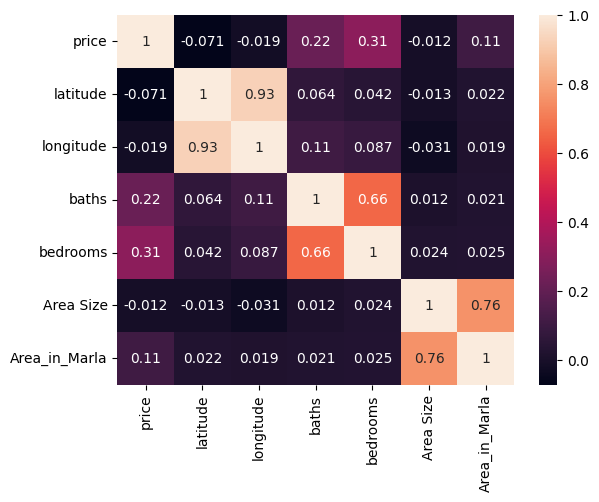

In [104]:
sns.heatmap(data2.corr(),annot=True)

Price is our Dependent Variable so the correlation with price of baths,bedrooms,area_in_marla has really good correlation so we will drop others column after doing EDA.

In [106]:
data2.drop(['Area Type','Area Size'],axis=1,inplace=True)

In [108]:
data2.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,Self,Self,4.0
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,Self,Self,5.6
2,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,Self,Self,8.0
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,Self,Self,40.0
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,8.0


Save that dataset for now to do EDA

In [111]:
data2.to_csv('EDA_dataset.csv')

### 3.6 Drop
Let's drop the unwanted features

In [114]:
data2.drop(['province_name',
            'agent',
            'agency',
            'date_added',
            'longitude',
            'latitude'],
           axis=1,
           inplace=True)
data2.head()

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


Check for unique values in each

In [115]:
data2['property_type'].unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

In [123]:
list(data2['location'].unique())

['G-10',
 'E-11',
 'G-15',
 'Bani Gala',
 'DHA Defence',
 'Ghauri Town',
 'Korang Town',
 'F-11',
 'Diplomatic Enclave',
 'F-6',
 'B-17',
 'PWD Housing Scheme',
 'G-11',
 'Bhara kahu',
 'Garden Town',
 'Koral Town',
 'Soan Garden',
 'Blue Area',
 'F-7',
 'I-16',
 'E-7',
 'Pakistan Town',
 'Islamabad Expressway',
 'G-8',
 'Model Town',
 'Multan Road',
 'Eden',
 'Gulberg',
 'Allama Iqbal Town',
 'Military Accounts Housing Society',
 'EME Society',
 'Izmir Town',
 'Upper Mall',
 'Cavalry Ground',
 'Bahria Town',
 'Askari',
 'Bedian Road',
 'Agrics Town',
 'Chaman Park',
 'Chungi Amar Sadhu',
 'GOR',
 'Karim Park',
 'Cantt',
 'Valencia Housing Society',
 'Gulshan-e-Ravi',
 'Al-Raheem Garden',
 'Mateen Avenue',
 'Paragon City',
 'IEP Engineers Town',
 'Muslim Town',
 'Millat Town',
 'Raza Abad',
 'Satiana Road',
 'Humak',
 'Westridge',
 'Bahria Town Rawalpindi',
 'Gulshan Abad',
 'Media Town',
 'Chaklala Scheme',
 'Chakri Road',
 'Askari 14',
 'Askari 13',
 'Askari 12',
 'Judicial Colony',


In [124]:
data2['city'].unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [125]:
data2['purpose'].unique(
)

array(['For Sale', 'For Rent'], dtype=object)

check point

In [129]:
data3=data2.copy()

Save dataset for model building

Making Dependent and independent features

### 3.7 Outliers Detection

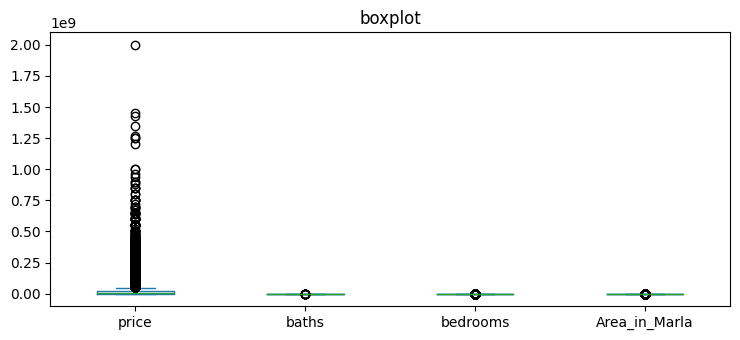

In [156]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

ax = data3[['price', 'baths', 'bedrooms', 'Area_in_Marla']].plot(kind='box', title='boxplot')
plt.show()

3.7.1 Price Outliers removel

<ipython-input-158-9a8269eb3f0e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data3['price'],kde=False)


<Axes: >

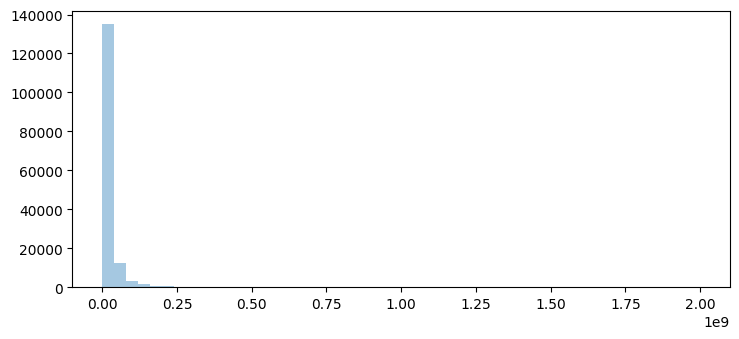

In [158]:
sns.distplot(x=data3['price'],kde=False)

In [184]:
#Removing Outliers by using Percentile
min_thresold=data3['price'].quantile(0.01)
max_thresold=data3['price'].quantile(0.90)
min_thresold,max_thresold

(15000.0, 45000000.0)

In [185]:
data4=data3[(data3['price']>min_thresold)&(data3['price']<max_thresold)]

<ipython-input-186-2f4b2f0d7d77>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data4['price'],kde=False)


<Axes: >

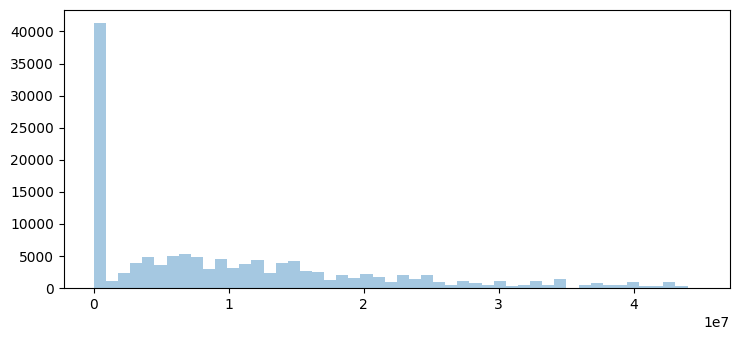

In [186]:
sns.distplot(x=data4['price'],kde=False)

3.7.2 Baths outliers removel

<ipython-input-187-e66e9cc75e25>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data4['baths'],kde=False)


<Axes: >

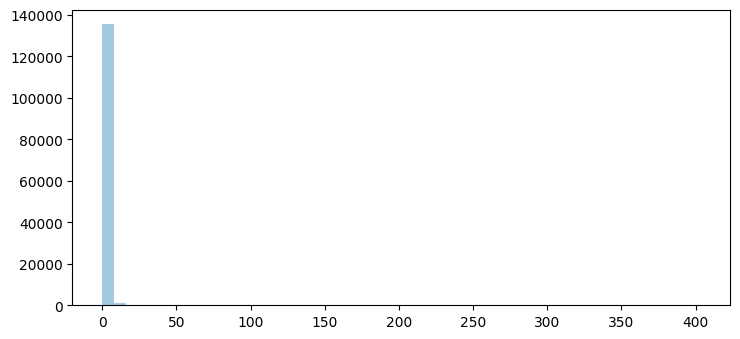

In [187]:
sns.distplot(x=data4['baths'],kde=False)

In [188]:
min_thresold=data4['baths'].quantile(0.01)
max_thresold=data4['baths'].quantile(0.99)
min_thresold,max_thresold

(0.0, 8.0)

In [189]:
data5=data4[(data4['baths']>min_thresold)&(data4['baths']<max_thresold)]

<ipython-input-190-c5787217527d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data5['baths'],kde=False)


<Axes: >

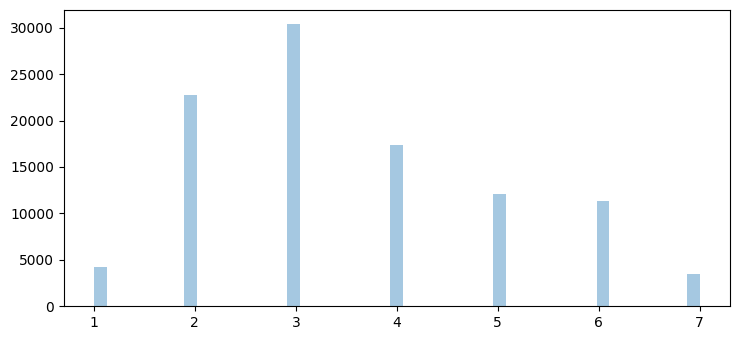

In [190]:
sns.distplot(x=data5['baths'],kde=False)

3.7.3 Bedrooms remvoel

<ipython-input-191-ed063ae78b6c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data5['bedrooms'],kde=False)


<Axes: xlabel='bedrooms'>

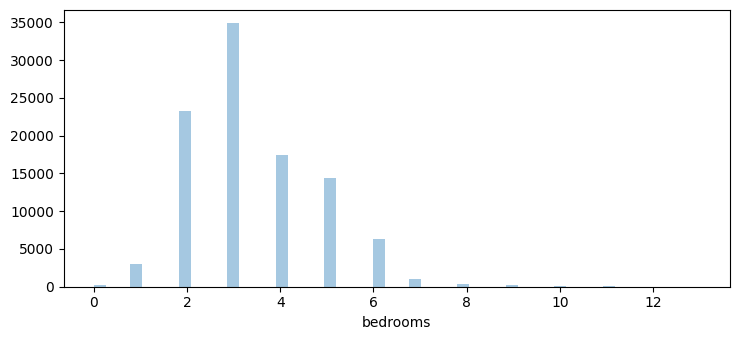

In [191]:
sns.distplot(data5['bedrooms'],kde=False)

In [192]:
max_thresold=data5['baths'].quantile(0.99)
max_thresold

7.0

In [194]:
data6=data5[(data5['bedrooms']<max_thresold)]

3.7.4 Size in Marla outliers removel

<ipython-input-195-a9d2f4f015d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data6['Area_in_Marla'],kde=False)


<Axes: >

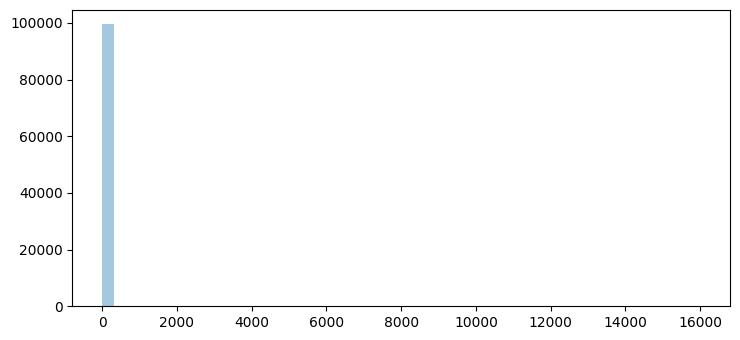

In [195]:
sns.distplot(x=data6['Area_in_Marla'],kde=False)

In [218]:
max_thresold=data6['Area_in_Marla'].quantile(0.999)
max_thresold

200.0

In [219]:
data6[data6['Area_in_Marla']>max_thresold]

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
4923,Farm House,650000,Chak Shahzad,Islamabad,4,For Rent,4,400.0
10511,Farm House,650000,Chak Shahzad,Islamabad,4,For Rent,4,400.0
13306,Farm House,850000,Orchard Scheme,Islamabad,5,For Rent,5,400.0
14863,Room,18000,G-9,Islamabad,1,For Rent,1,280.0
15553,House,6800000,Wazir Town,Rawalpindi,4,For Sale,3,1250.0
21099,Farm House,600000,Chak Shahzad,Islamabad,5,For Rent,5,400.0
21558,Upper Portion,13500000,Gulistan-e-Jauhar,Karachi,3,For Sale,3,240.0
30276,Upper Portion,35000,Naval Anchorage,Islamabad,2,For Rent,2,10000.0
42853,Upper Portion,65000,Gulshan-e-Iqbal Town,Karachi,4,For Rent,4,240.0
45599,House,24000000,North Karachi,Karachi,3,For Sale,3,288.0


In [220]:
data7=data6[(data6['Area_in_Marla']<max_thresold)]


<ipython-input-221-722035bcf69d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data7['Area_in_Marla'],kde=False)


<Axes: >

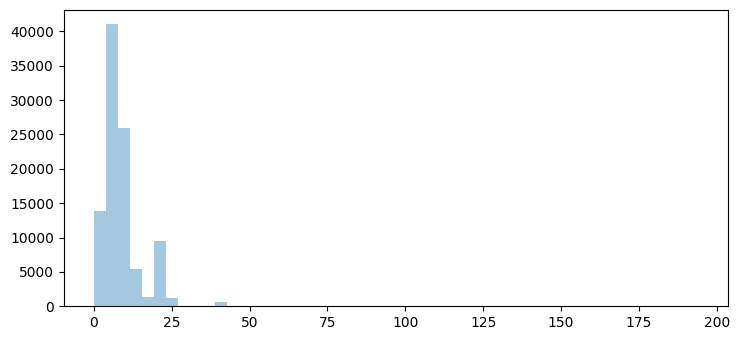

In [221]:
sns.distplot(x=data7['Area_in_Marla'],kde=False)

In [223]:
data7.to_csv('cleaned_data_for_model.csv')